In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import random


In [63]:
##data importing
##reading data
df_apps=pd.read_csv("application_data.csv")

In [3]:
##reading the top 5 content of the file
df_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
##taking the shape of the data
print(df_apps.shape)

(307511, 122)


In [5]:
##data types of the application.csv file
df_apps.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
##getting into the size,shaper and unique values in each column of the application data
df_apps.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


In [8]:
##data quality check and Missing Values
def column_wise_null_per(df):
    out=round(df.isnull().sum()/len(df.index)*100,2)
    return out

In [9]:
NA_col=column_wise_null_per(df_apps)
NA_col


SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [10]:
NA_col=NA_col[NA_col>0]
NA_col

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
Length: 64, dtype: float64

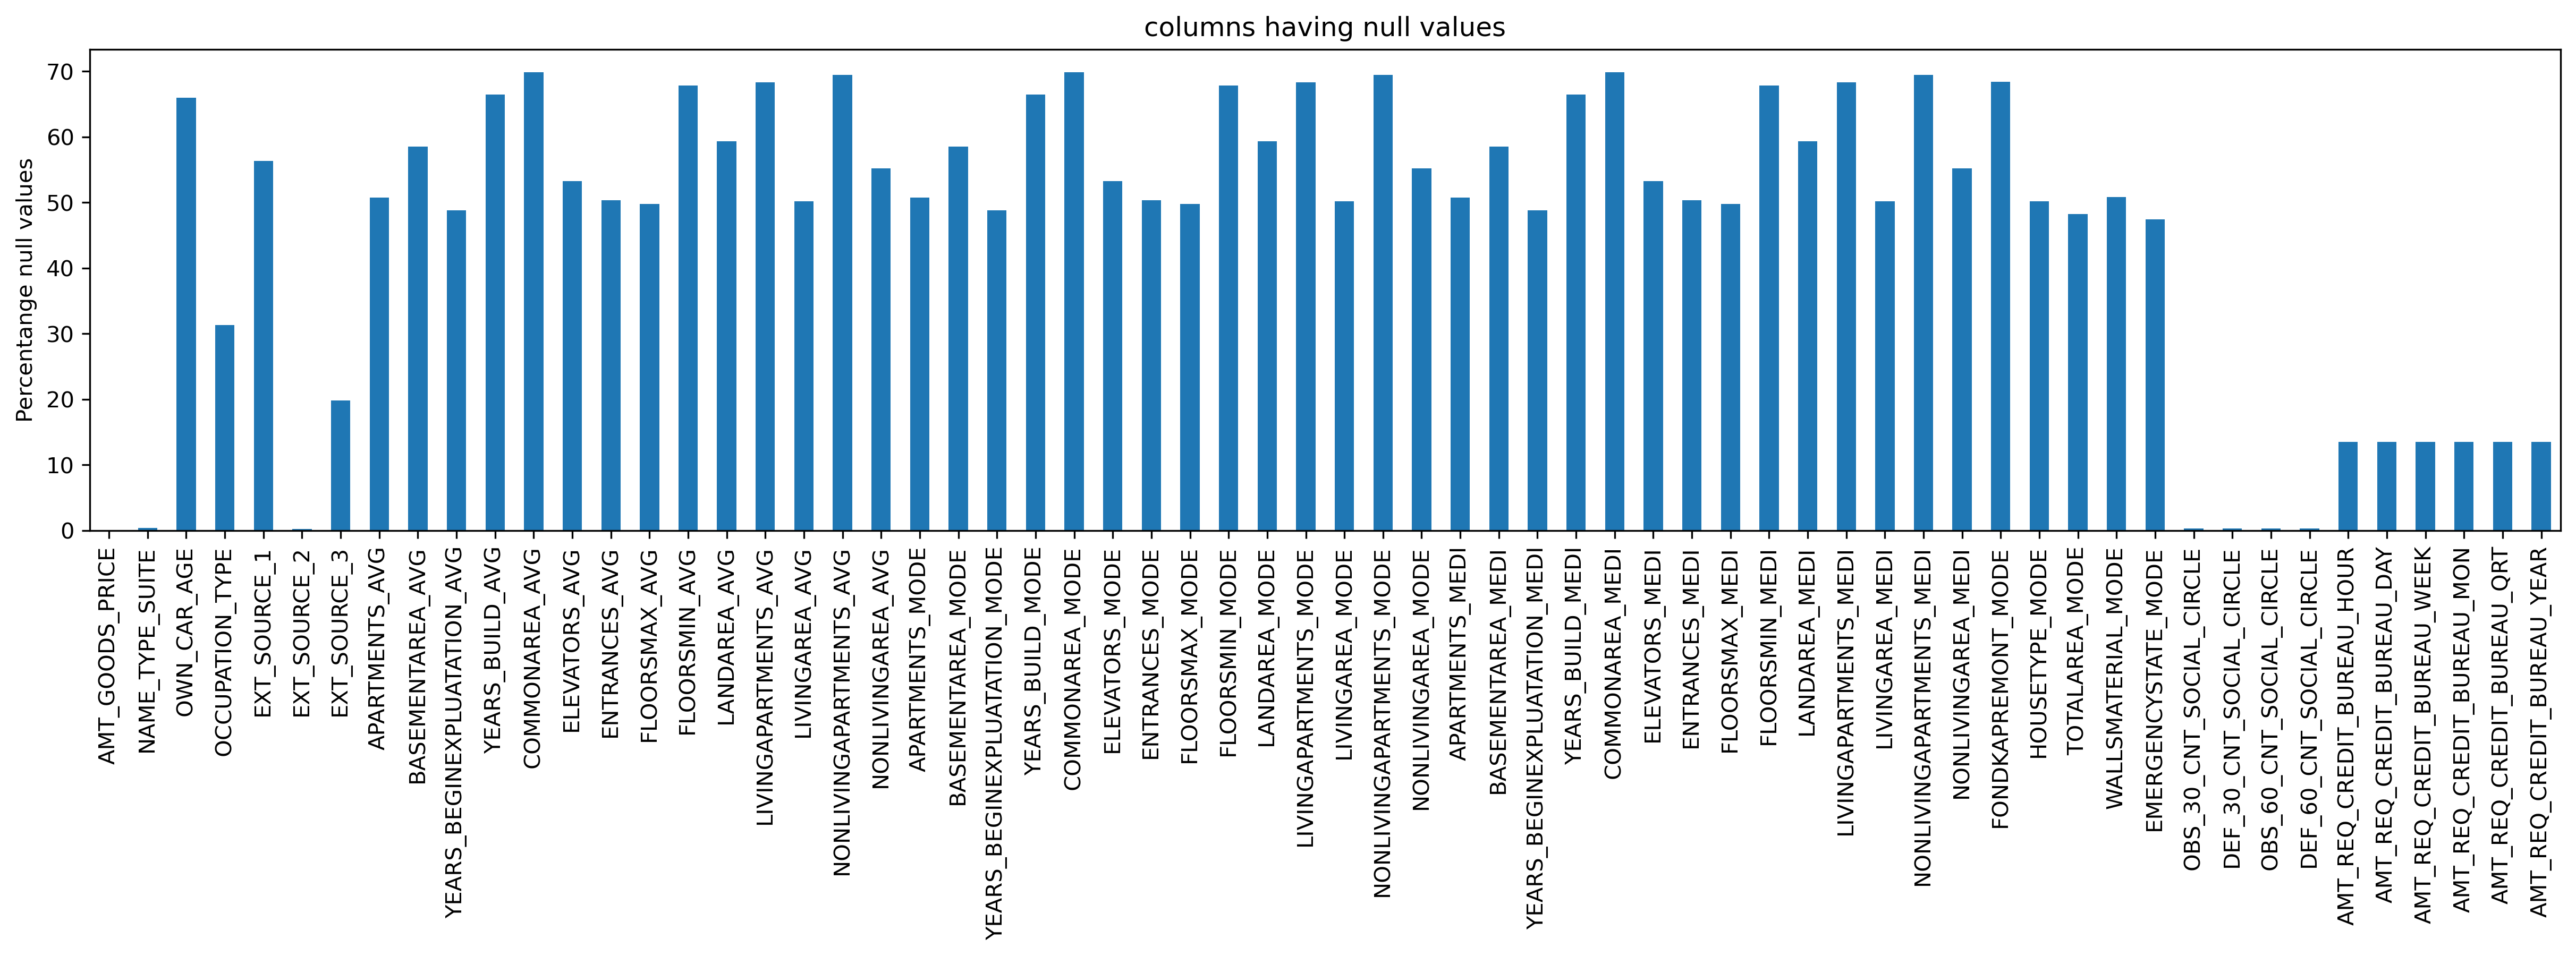

In [11]:
###Graphincal Representation of the coumns having % null values 
plt.figure(figsize=(20,4),dpi=300)
NA_col.plot(kind='bar')
plt.title('columns having null values')
plt.ylabel('Percentange null values')
plt.show()

In [12]:
#Getting the values in the columns having the null values more than 50%
NA_col_50=NA_col[NA_col>50]
print(NA_col_50)

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [13]:
##Droppin all the columns having DataFrames missing more than 50%
df_apps=df_apps.drop(NA_col_50.index,axis=1)
df_apps.shape

(307511, 81)

In [14]:
#Identifing the columns having the values missing less  than (15%)
NA_col_15=NA_col[NA_col<15]
print(NA_col_15)

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


In [15]:
#identiffing the unique values in the columns havoing the <15% null values
df_apps[NA_col_15.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  119831
AMT_GOODS_PRICE                 1002
OBS_60_CNT_SOCIAL_CIRCLE          33
OBS_30_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_60_CNT_SOCIAL_CIRCLE           9
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_HOUR         5
dtype: int64

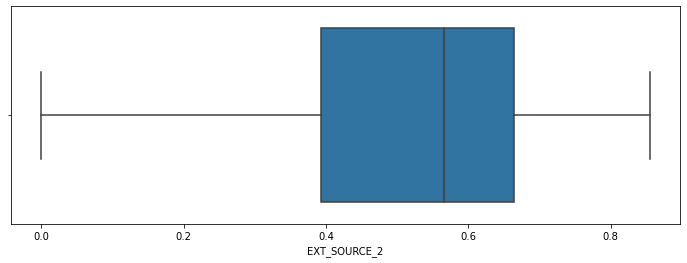

In [16]:
##Box Plot for the continuious variable
plt.figure(figsize=(12,4))
sns.boxplot(df_apps['EXT_SOURCE_2'])
plt.show()

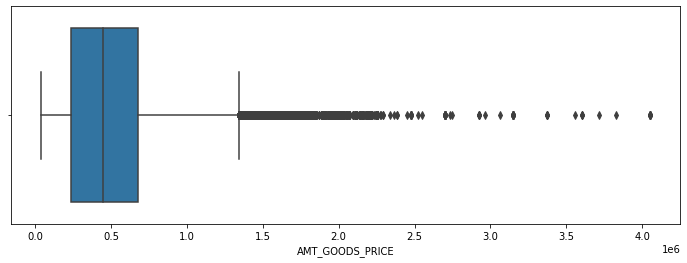

In [17]:

plt.figure(figsize=(12,4))
sns.boxplot(df_apps['AMT_GOODS_PRICE'])
plt.show()

INFERENCE FROM BOX PLOT
for"EXT_SOURCE_2" there is no outliers present.and there is no Siginificant difference observed mean and median.However data look to right skewed. So many missing values can be imputed with median values:.565
for "AMT_GOOD_PRICE" there is siginficant number of outlier present in the data.So data should be imputed with median value:450000

In [18]:
###Removing the unwanted column from the application dataset for the better analysis
unwanted_col=["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE",'FLAG_EMAIL',
              "FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10",
              "FLAG_DOCUMENT_11",'FLAG_DOCUMENT_12',"FLAG_DOCUMENT_13","FLAG_DOCUMENT_14",'FLAG_DOCUMENT_15',"FLAG_DOCUMENT_16",
              "FLAG_DOCUMENT_17",'FLAG_DOCUMENT_18',"FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",'FLAG_DOCUMENT_21',
              "EXT_SOURCE_2","EXT_SOURCE_3","YEARS_BEGINEXPLUATATION_AVG","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI",
              "FLOORSMAX_AVG","FLOORSMAX_MODE","FLOORSMAX_MEDI","TOTALAREA_MODE","EMERGENCYSTATE_MODE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY",
              "CNT_FAM_MEMBERS","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4"]
df_apps.drop(labels=unwanted_col,axis=1,inplace=True)

In [19]:
df_apps.shape

(307511, 42)

In [20]:
df_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


 code for the gender column to find the number of null values which is given as XNA
 

In [21]:
##For Code Gender Column
print("CODE_GENDER:",df_apps["CODE_GENDER"].unique())
print("No of values:",df_apps[df_apps["CODE_GENDER"]=="XNA"].shape[0])
XNA_count=df_apps[df_apps["CODE_GENDER"]=="XNA"].shape[0]
per_XNA=round(XNA_count/len(df_apps.index)*100,3)
print("% of XNA Values:",per_XNA)
print("maximum frequency data:",df_apps["CODE_GENDER"].describe().top)

CODE_GENDER: ['M' 'F' 'XNA']
No of values: 4
% of XNA Values: 0.001
maximum frequency data: F


In [22]:
##Dropping the XNA vlaues in column "code_gender " with"F"for the dataset
df_apps=df_apps.drop(df_apps.loc[df_apps["CODE_GENDER"]=="XNA"].index)
df_apps[df_apps["CODE_GENDER"]=="XNA"].shape

(0, 42)

In [23]:
print("No of XNA values:",df_apps[df_apps["ORGANIZATION_TYPE"]=="XNA"].shape[0])
XNA_COUNT=df_apps[df_apps["ORGANIZATION_TYPE"]=="XNA"].shape[0]
per_XNA=round(XNA_count/len(df_apps.index)*100,3)
print("% of XNA Values:",per_XNA)
df_apps["ORGANIZATION_TYPE"].describe()

No of XNA values: 55374
% of XNA Values: 0.001


count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [24]:
df_apps.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,307507.000000,...,306486.000000,306486.000000,306486.000000,307506.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,63815.929208,...,0.143406,1.405255,0.100034,-962.860546,0.006403,0.007000,0.034362,0.267388,0.265474,1.899950
std,102790.132982,0.27242,0.722119,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,4363.982424,141276.472519,...,0.446644,2.379744,0.362221,826.811491,0.083850,0.110758,0.204686,0.915994,0.794060,1.869286
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189146.500000,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278203.000000,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367143.500000,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [25]:
numeric_columns=["TARGET","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","DAYS_BIRTH"
                ,"DAYS_EMPLOYED","REGION_POPULATION_RELATIVE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START"
                ,"LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY",
                "DAYS_LAST_PHONE_CHANGE"]
df_apps[numeric_columns]=df_apps[numeric_columns].apply(pd.to_numeric)
df_apps.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
##CONERTING "NEGATIVE VALUES INTO POSITIVE VALUES"
df_apps["DAYS_BIRTH"]=df_apps["DAYS_BIRTH"].abs()
df_apps["DAYS_EMPLOYED"]=df_apps["DAYS_EMPLOYED"].abs()
df_apps["DAYS_REGISTRATION"]=df_apps["DAYS_REGISTRATION"].abs()
df_apps["DAYS_ID_PUBLISH"]=df_apps["DAYS_ID_PUBLISH"].abs()
df_apps["DAYS_LAST_PHONE_CHANGE"]=df_apps["DAYS_LAST_PHONE_CHANGE"].abs()

In [27]:
df_apps[numeric_columns].describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE
count,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307506.000000
mean,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,16037.027271,67725.569893,0.020868,4986.131376,2994.201670,12.063394,0.040659,0.078174,0.230457,0.179557,962.860546
std,0.27242,0.722119,2.371246e+05,4.024926e+05,14493.798379,4363.982424,139444.469301,0.013831,3522.883030,1509.454566,3.265835,0.197500,0.268445,0.421126,0.383819,826.811491
min,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,7489.000000,0.000000,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,12413.000000,933.000000,0.010006,2010.000000,1720.000000,10.000000,0.000000,0.000000,0.000000,0.000000,274.000000
50%,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,15750.000000,2219.000000,0.018850,4504.000000,3254.000000,12.000000,0.000000,0.000000,0.000000,0.000000,757.000000
75%,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,19682.000000,5707.000000,0.028663,7479.500000,4299.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1570.000000
max,1.00000,19.000000,1.170000e+08,4.050000e+06,258025.500000,25229.000000,365243.000000,0.072508,24672.000000,7197.000000,23.000000,1.000000,1.000000,1.000000,1.000000,4292.000000


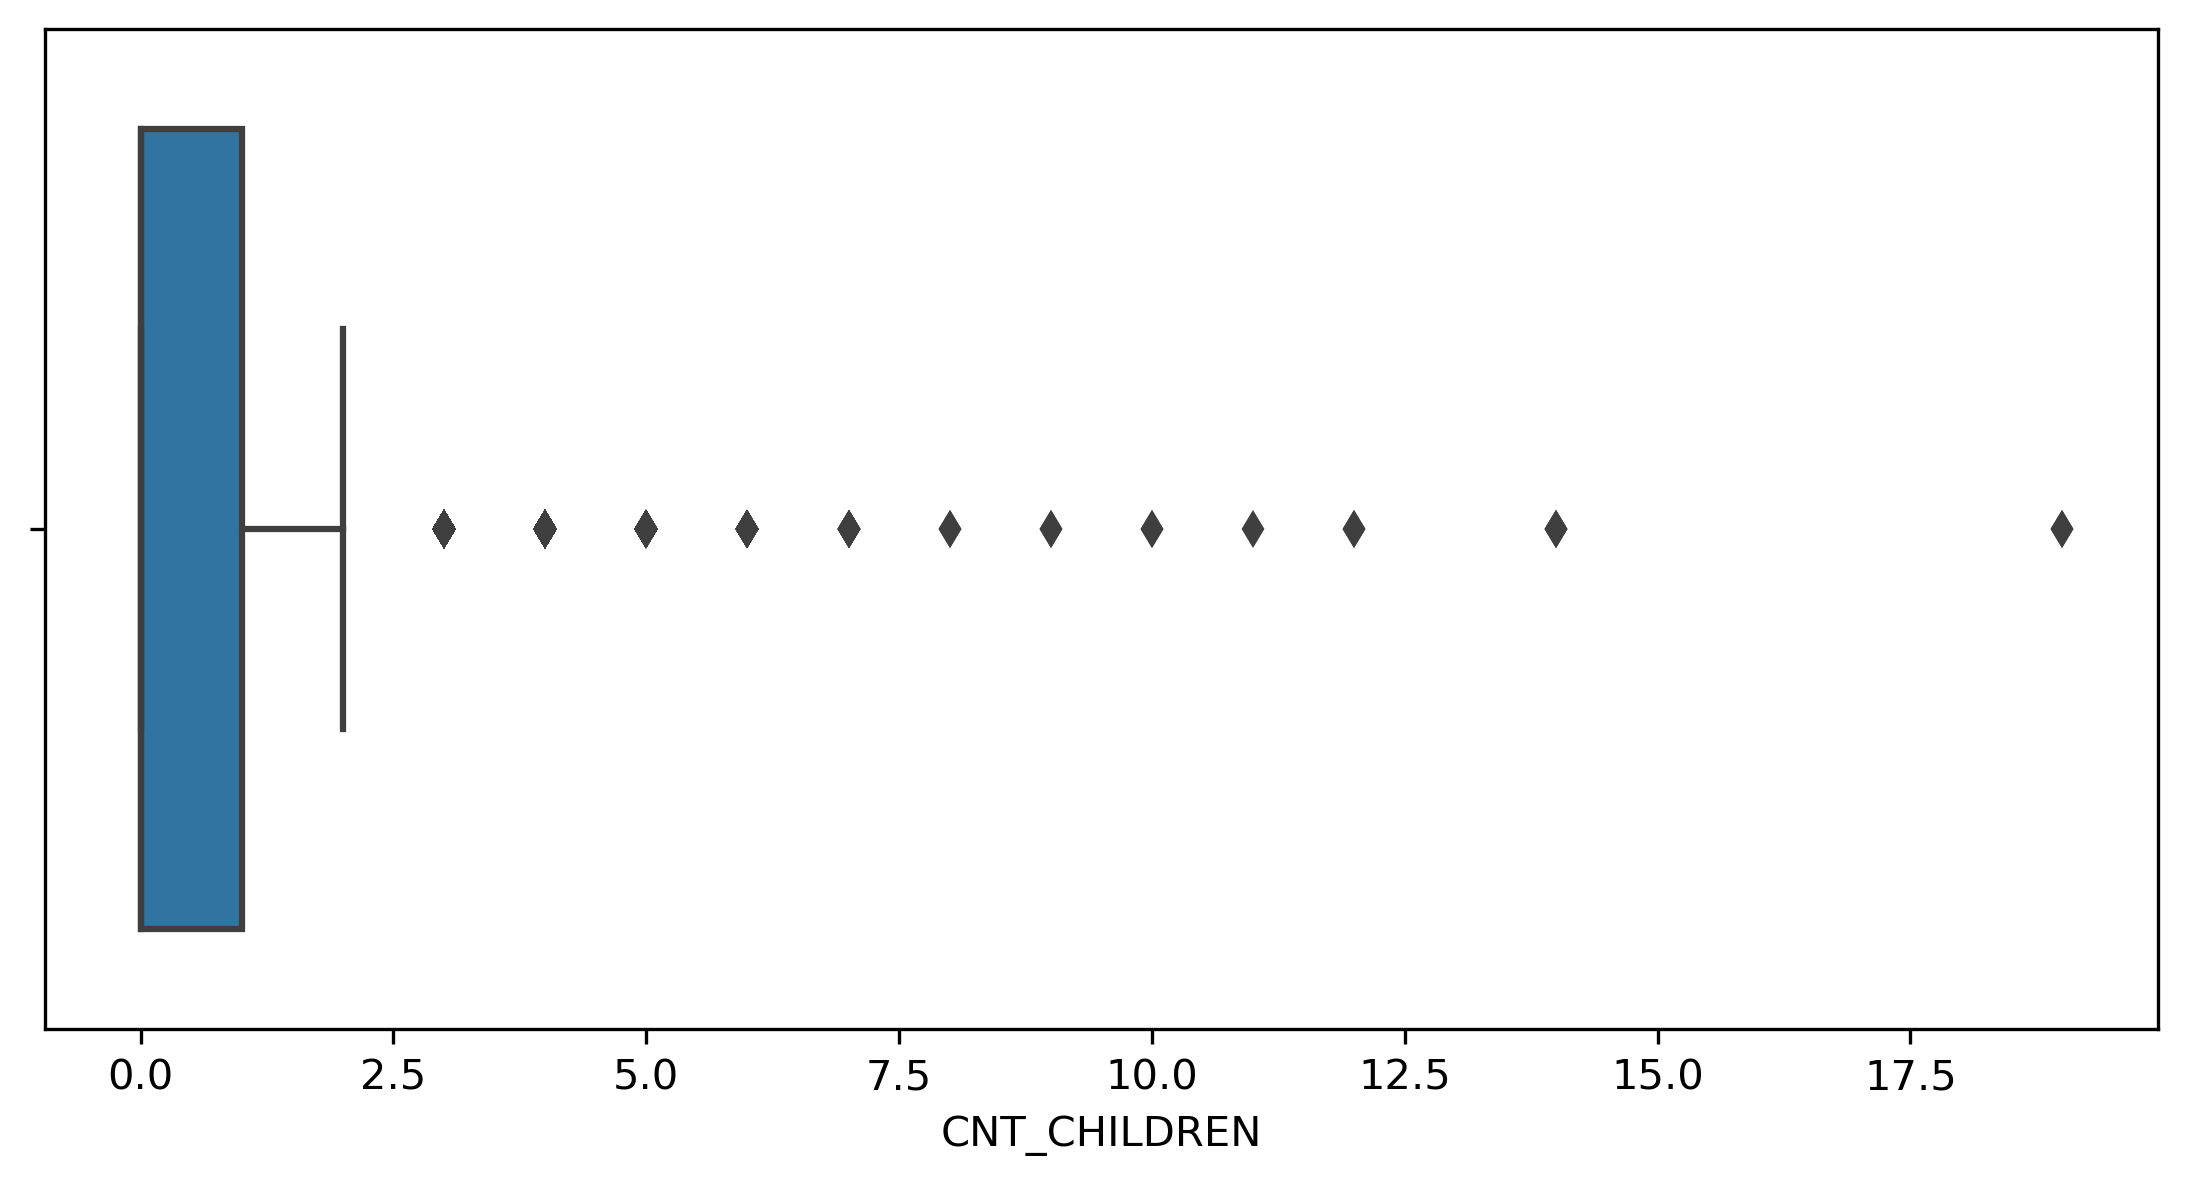

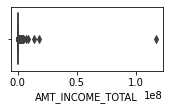

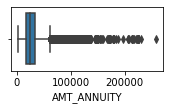

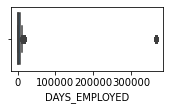

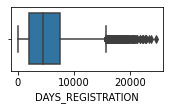

In [28]:
##Box plot for selected columns
features=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_ANNUITY","DAYS_EMPLOYED","DAYS_REGISTRATION"]
plt.figure(figsize=(20,15),dpi=300)
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=i[1],data=df_apps)
    plt.show()

From the above plot and describe analyssis we found this as below
The first quartile almost missing for the CNT_CHILDREN that means most of the data are present in the first quartile.
There is single high value data point as outlier presnet in AMT_INCOME_TOTAL and Removal this poitn will dtrastically imapct the box plot for futher analysis.
the first quartile is slim compare to third quartile for AMT_ANNUITY","DAYS_EMPLOYED","DAYS_REGISTRATION".this mean data are skews towards first quartile.

In [29]:
##bin Creation for AMT_INCOME_TOTAL and AMT_CERDIT
bins=[0,100000,200000,300000,400000,500000,10000000000]
slot=["<100000","100000-200000","200000-300000","300000-400000","400000-500000","500000 and above"]
df_apps["AMT_INCOME_RANGE"]=pd.cut(df_apps["AMT_INCOME_TOTAL"],bins,labels=slot)

In [30]:
##bin Creation for AMT_INCOME_TOTAL and AMT_CERDIT
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot=["<100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","850000-900000","900000 and above"]
df_apps["AMT_CREDIT_RANGE"]=pd.cut(df_apps["AMT_CREDIT"],bins,labels=slot)

In [31]:
#Dividing the dataset into tow dataset of target=1(client with payment difficulties )and target=0(all other)


target0_df=df_apps.loc[df_apps["TARGET"]==0]
target1_df=df_apps.loc[df_apps["TARGET"]==1]

In [32]:
percentage_defaulteers=round(100*len(target1_df)/(len(target0_df)+len(target1_df)),2)
percentage_nondefaulteers=round(100*len(target0_df)/(len(target0_df)+len(target1_df)),2)
print("count of target0_df:",len(target0_df))
print("count of target1_df:",len(target1_df))
print("percentage of the people who paid their loan are:",percentage_nondefaulteers,"%")
print("percentage of the people who not paid their loan are:",percentage_defaulteers,"%")

count of target0_df: 282682
count of target1_df: 24825
percentage of the people who paid their loan are: 91.93 %
percentage of the people who not paid their loan are: 8.07 %


In [33]:
imb_ratio=round(len(target0_df)/len(target1_df),2)
print("imbalance Ratio in both is given by:",imb_ratio)

imbalance Ratio in both is given by: 11.39


Univariate analysis for target 0

In [34]:
def uniplot(df,col,title,hue=None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    temp=pd.Series(data=hue)
    fig, ax=plt.subplot()
    width=len(df[col].unique())+7+4*len(tem.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue)
    plt.show()

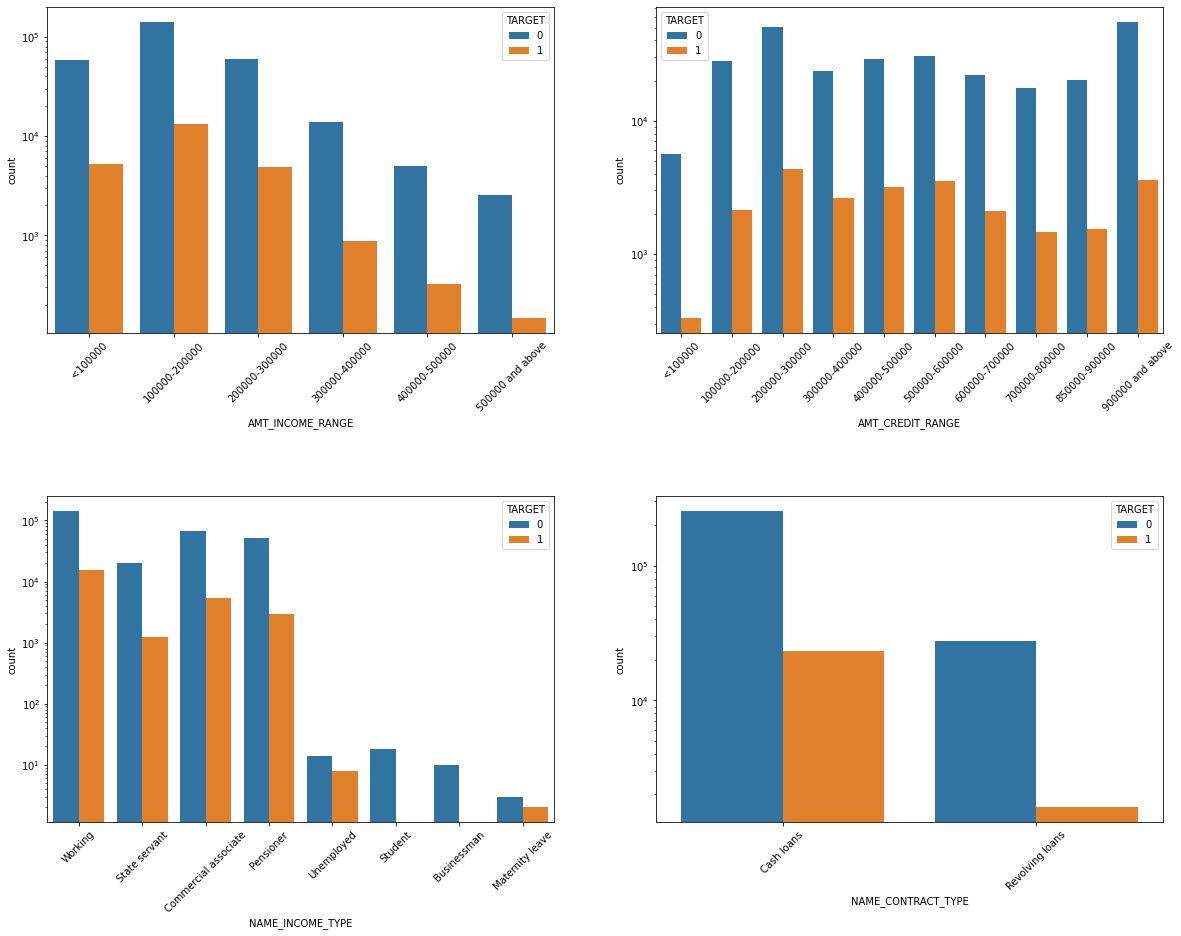

In [35]:
features=["AMT_INCOME_RANGE","AMT_CREDIT_RANGE","NAME_INCOME_TYPE","NAME_CONTRACT_TYPE"]
plt.figure(figsize=(20,15))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i[1],hue="TARGET",data=df_apps)
    plt.rcParams["axes.titlesize"]=16
    plt.xticks(rotation=45)
    plt.yscale('log')

AMT_INCOME_RANGE:

THE PEOPLE HAVING HIGER NUMBER OF LOAN IN 100000-200000 &MORE NUMBER OF DEFAULTER ARE PRESENT IN THIS LIST.

THE INCOME SEGMENT MORE THAN 500000 HAS NUMBER OF DEFAULTER

AMT_CREDIT_RANGE:
THE PEOPLE HAVING <100000 LOAN ARE LESS DEFAULTER

INCOME HAVING MORE THAN TAHT>100000 ARE ALMOST EQUAL PERCENTAGE OF LOAN DEFAULTER

NAME_INCOME_TYPE:
STUDENT PERNSIONER AND BUSSSINESS HAVE HIGER PERCENTAGE OF LOAN REPAYMENT

WORKING STAER GOVERMENT ANMD COMMERCIAL ASSOCIATE HAVE HIGHERT DEFAULT PERCENTAGE.

MATERNITY CATEGORY IS SIGNIFICANTLY HIGHER PROBLEM IN REPLAYEMENT

NAME_CONTRACT_TYPE:

FOR CONTRACT TYPE "CASH LOANS" IS HAVING HIGHER NUMBER OF CREDITS THAN "REVOLVING LOANS" CONTRACT TYPES.

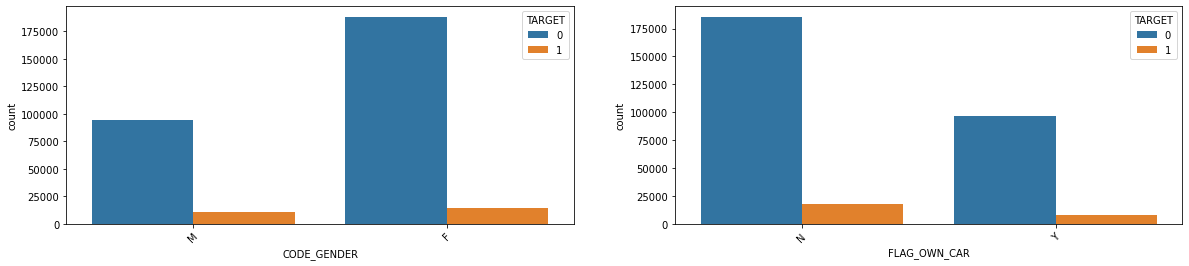

In [36]:
#cATEGORICAL uNIVARIATE Analysis in value scale
features=["CODE_GENDER","FLAG_OWN_CAR"]
plt.figure(figsize=(20,10))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i[1],hue="TARGET",data=df_apps)
    plt.rcParams['axes.titlesize']=16
    plt.xticks(rotation=45)


code_Gender:
the percentage of defaulter are more in male than Female



flag_own_car:
the person owning car is having higher percentage of defaulter.

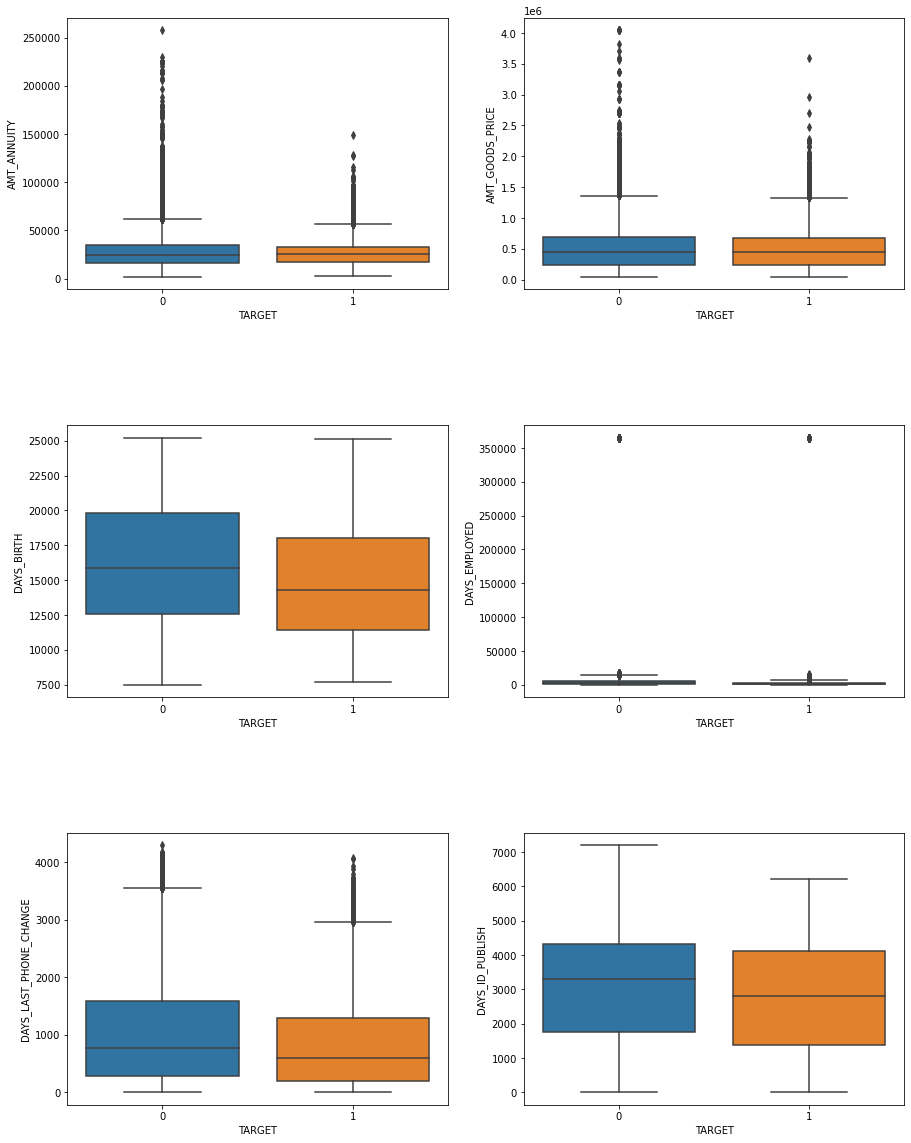

In [37]:
##Univariate Analysis for continous variable
features=["AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_LAST_PHONE_CHANGE","DAYS_ID_PUBLISH"]
plt.figure(figsize=(15,20))
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x="TARGET",y=i[1],data=df_apps)

Inference:
Days_Birth:the people having age are having higher probaltiy of repayment.
\some outliers are observed on AMT_ANNITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_LST_PHONE_CHANGE in the datsset.
less outliert observered in days_birth and Days_id_publish


# READING THE PREVIOUS APPLICATION DATA AND MERGING WITH THE APPLICATION DATA

In [38]:
df_prev=pd.read_csv("previous_application.csv")

In [39]:
df_prev.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_prev.shape

(1670214, 37)

In [41]:
##data type of previous application
df_prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [42]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [43]:
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [44]:
df_apps.shape

(307507, 44)

In [45]:
df_prev.shape

(1670214, 37)

In [46]:
all_data_df=pd.merge(left=df_apps,right=df_prev,how="inner",on="SK_ID_CURR",suffixes="_x")

In [47]:
all_data_df.shape

(1413646, 80)

In [48]:
all_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [49]:
all_data_df["NAME_CONTRACT_STATUS"].value_counts()*100/len(all_data_df)

Approved        62.680190
Canceled        18.352119
Refused         17.356891
Unused offer     1.610799
Name: NAME_CONTRACT_STATUS, dtype: float64

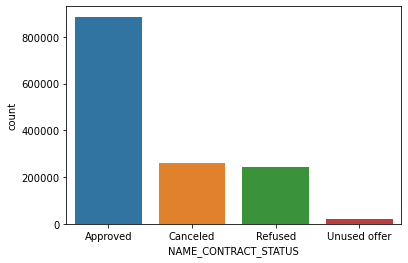

In [50]:
sns.countplot(all_data_df["NAME_CONTRACT_STATUS"])
plt.show()

In [51]:
all_data_df["NAME_CONTRACT_TYPEx"].value_counts()

Cash loans         626741
Consumer loans     625239
Revolving loans    161353
XNA                   313
Name: NAME_CONTRACT_TYPEx, dtype: int64

In [52]:
approved_df=all_data_df[all_data_df["NAME_CONTRACT_STATUS"]=="Approved"]
refused_df=all_data_df[all_data_df["NAME_CONTRACT_STATUS"]=="Refused"]
canceled_df=all_data_df[all_data_df["NAME_CONTRACT_STATUS"]=="Canceled"]
unused_df=all_data_df[all_data_df["NAME_CONTRACT_STATUS"]=="Unused offer"]

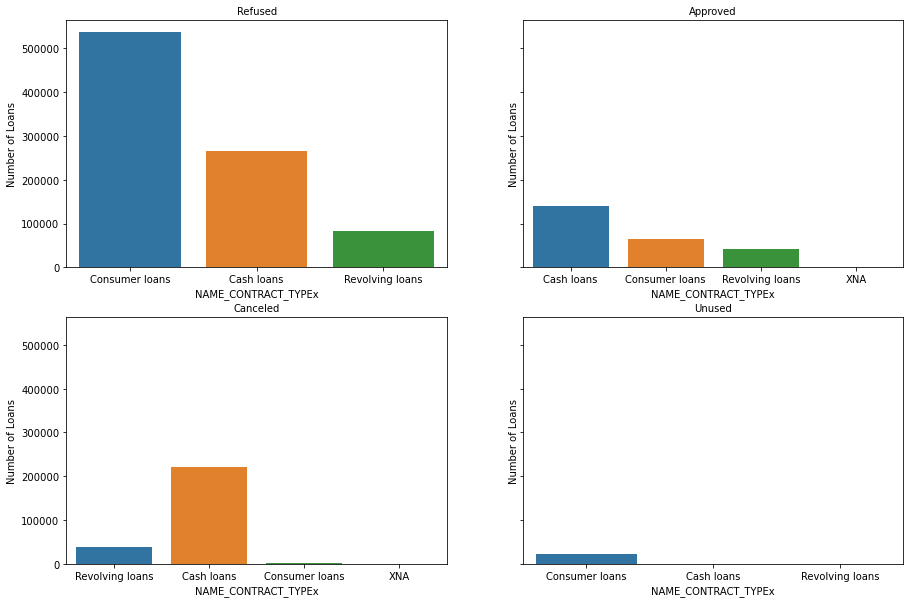

In [53]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,10),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x="NAME_CONTRACT_TYPEx")
ax1.set_title("Refused",fontsize=10)
ax1.set_xlabel("NAME_CONTRACT_TYPEx")
ax1.set_ylabel("Number of Loans")

ax2=sns.countplot(ax=ax2,data=refused_df,x="NAME_CONTRACT_TYPEx")
ax2.set_title("Approved",fontsize=10)
ax2.set_xlabel("NAME_CONTRACT_TYPEx")
ax2.set_ylabel("Number of Loans")

ax3=sns.countplot(ax=ax3,data=canceled_df,x="NAME_CONTRACT_TYPEx")
ax3.set_title("Canceled",fontsize=10)
ax3.set_xlabel("NAME_CONTRACT_TYPEx")
ax3.set_ylabel("Number of Loans")

ax4=sns.countplot(ax=ax4,data=unused_df,x="NAME_CONTRACT_TYPEx")
ax4.set_title("Unused",fontsize=10)
ax4.set_xlabel("NAME_CONTRACT_TYPEx")
ax4.set_ylabel("Number of Loans")
plt.show()

In [54]:
def multi_plot(variable_name):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,10),sharey="all")
    fig.tight_layout(pad=10.0)
    
    ax1=sns.countplot(ax=ax1,data=approved_df,x=variable_name)
    ax1.set_title("Refused",fontsize=10)
    ax1.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax1.set_ylabel("Number of Loans")

    ax2=sns.countplot(ax=ax2,data=refused_df,x=variable_name)
    ax2.set_title("Approved",fontsize=10)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax2.set_ylabel("Number of Loans")

    ax3=sns.countplot(ax=ax3,data=canceled_df,x=variable_name)
    ax3.set_title("Canceled",fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax4=sns.countplot(ax=ax4,data=unused_df,x=variable_name)
    ax4.set_title("Unused",fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    plt.show()

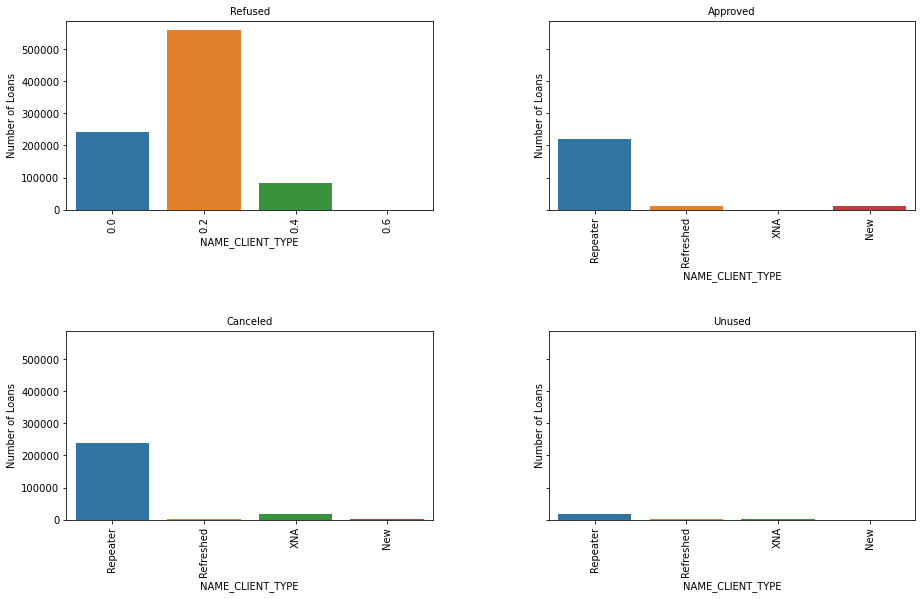

In [55]:
multi_plot("NAME_CLIENT_TYPE")

HERE WE CAN SEE THAT THE REPEATER IS GETTING MORE REFUSED BUT ALSO WE CAN SEE THAT THE IT ALSO GETING MORE APPROVED AND EVEN THAT IT IS GETTING MORE CANCELLED AND MORE UNUSED.

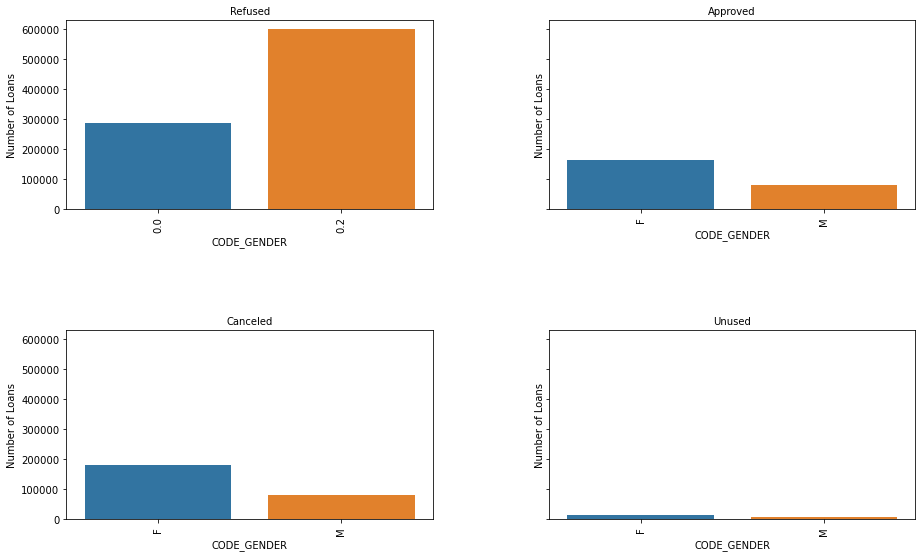

In [56]:
multi_plot("CODE_GENDER")

Here we can see that Female is getting more Refused more approved more canceled more unused but in case of male it is having average in every category.

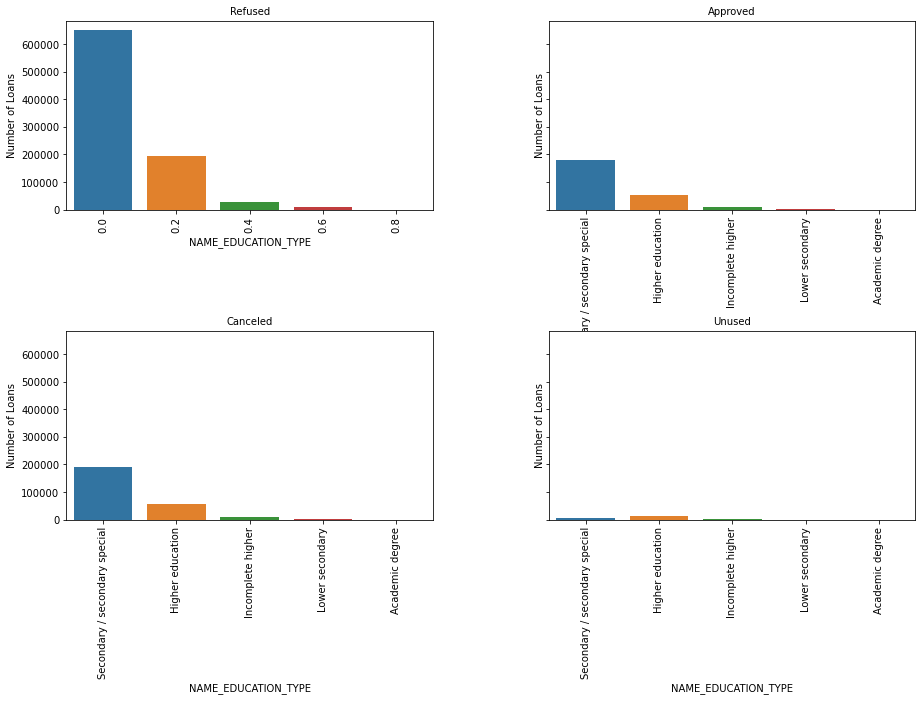

In [57]:
multi_plot("NAME_EDUCATION_TYPE")

HERE WE CAN THAT SECONDARY IS MORE EFFECTIVE IN EVERY CASE

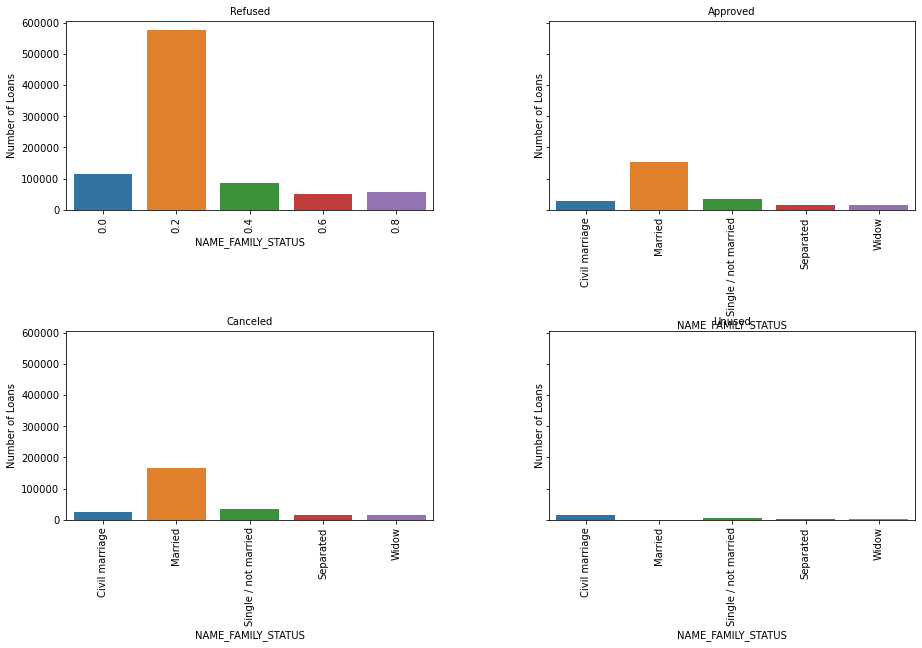

In [58]:
multi_plot("NAME_FAMILY_STATUS")

HERE WE CAN SEE THAT MARRIED COUPLE ARE TAKING MORE LOANS THAN OTHERS

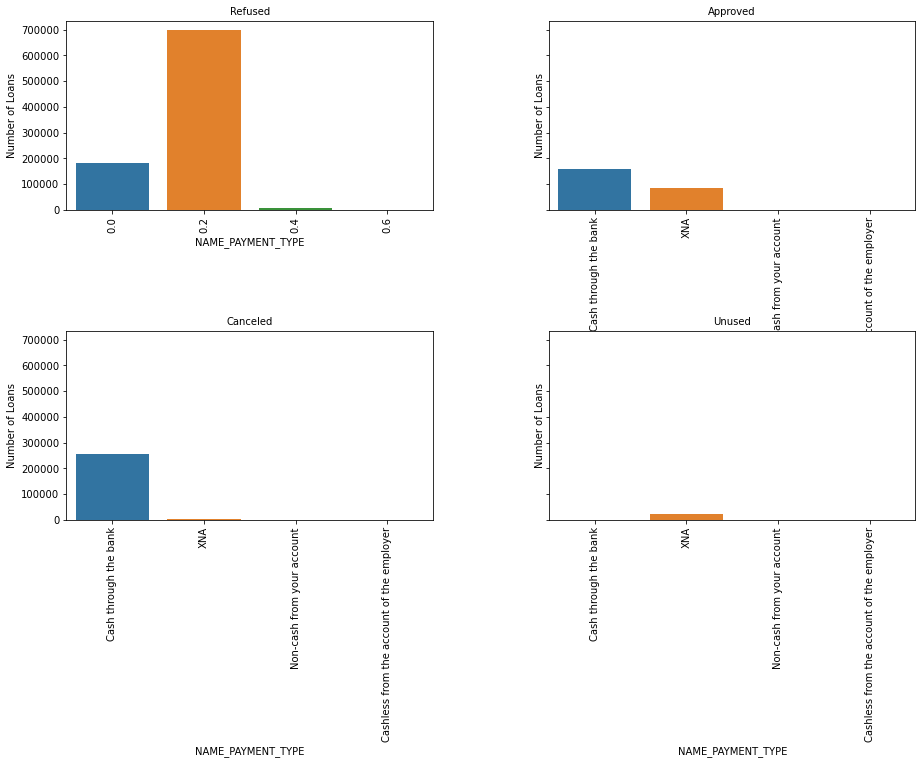

In [59]:
multi_plot("NAME_PAYMENT_TYPE")

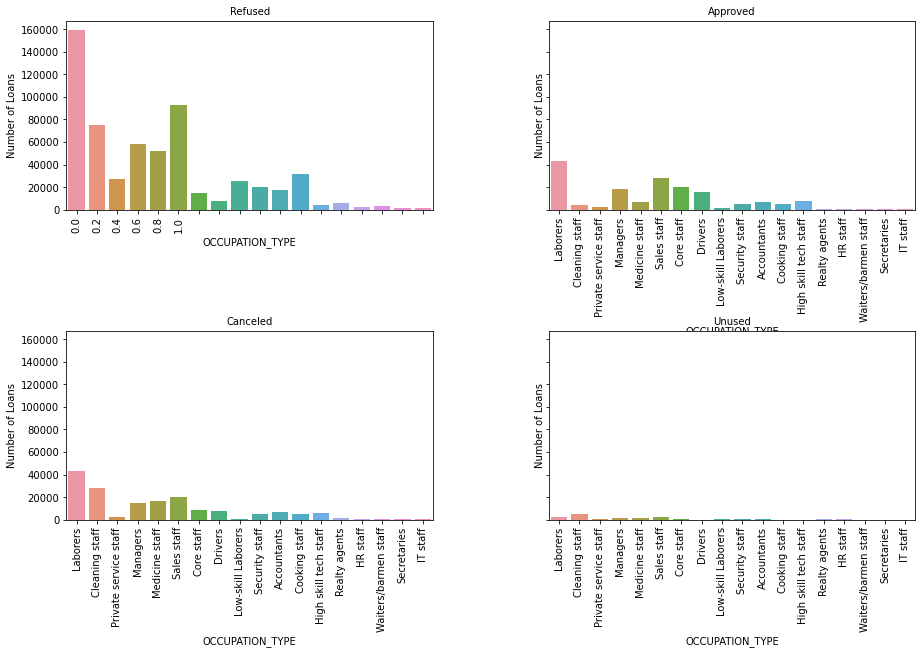

In [60]:
multi_plot("OCCUPATION_TYPE")

HERE LABORERRS ARE GETTING MOST REFUSED AND MOST APPROVED LOANS. AND ALSO SALES STAFF IS ALSO GETTING THE SECOND MOST REFUSED AND APPORVED LOANS.

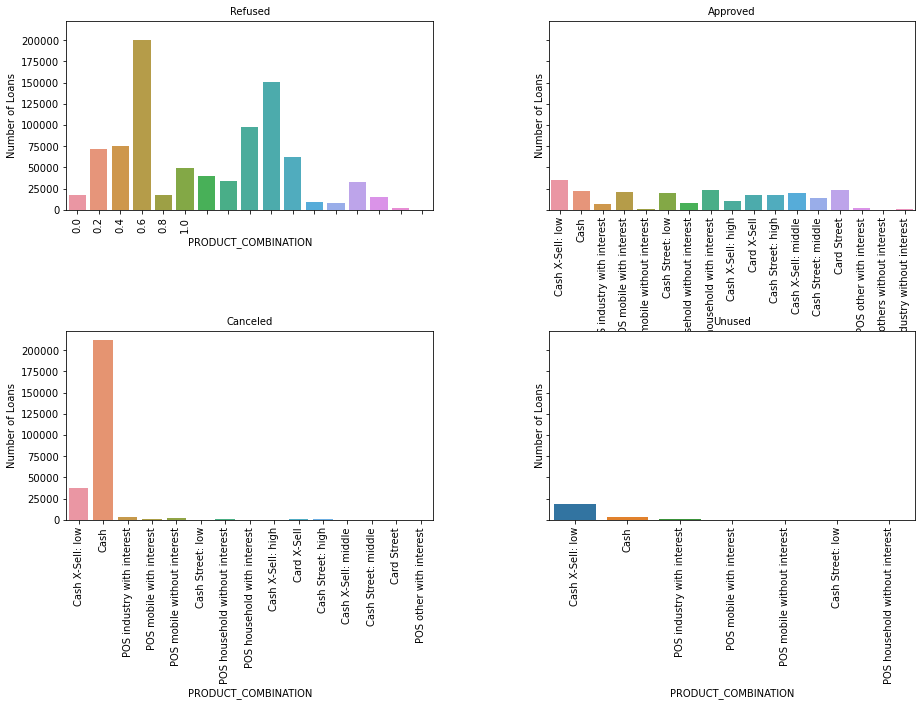

In [61]:
multi_plot("PRODUCT_COMBINATION")

THE MOST ACCEPTED LOAN IS CASH X SELL.LOW AND MOST CANCELLED LOAN IS CASH AND MOST UNUSED LOAN IS POS MOBILE WITH INTREST

#CONCLUSION
##BANKS SHOULD FOCUS MORE ON CONTRACT TYPE "STUDENT,"PENSIONER",AND BUSINESSMAN WITH HOUSING TYPE OTHER THAN CORPERATE FOR SUCCESSFUL PAYMENTS
##BANKS SHOULD FOCUS LESS ON INCOME TYPE WORKING AS THEY ARE HAVING MOST NUMBER OF UNSUCCESSFUL PAYMENT
##ALSO WITH LOAN PURPOSE "REPAIR"IS HAVING HIGHER NUMBER OF UNSUCCESSFUL PAYMENT ON TIME.
##GET AS MUCH AS CLIENT FROM HOUSING TYPE "WITHPARENTS AS THEY ARE HAVING LEAST NUMBVER OF UNSUCESSFUL "PAYMENT.